Load, process datasets.  
Label instances within datasets with hegemonic/marginalized/other target group labels
Build control dataset splits taking out random marginalized identities to compare with taking out hegemonic identities.

# Setup

## Dictionary of group terms -> normalized group names

### Create, save dictionary

In [49]:
# Build mapping combining groups
import json

groups_norm = {} # target_group: larger_group
groups_norm.update({
    'black folks': 'black people',
    'black': 'black people',
    'white': 'white people',
    'islam': 'muslims',
    'jewish folks': 'jews',
    'japanese': 'japanese people',
    'bisexual': 'bisexual people',
    'native_american': 'native american people',
    'non_binary': 'non-binary people',
    'young_adults': 'young adults',
    'mormon': 'mormons',
    'atheist': 'atheists',
    'middle_aged': 'middle-aged people',
    'seniors': 'older people',
    'old people': 'older people',
    'elderly': 'older people',
    'immigrant': 'immigrants',
    'xenophobia': 'immigrants',
    'wealthy people': 'rich people',
    'christian': 'christians',
    'asian': 'asian people',
    'asians': 'asian people',
    'native american/first nation folks': 'native american people',
    'jewish': 'jews',
    'muslim folks': 'muslims',
    'native american': 'native american people',
    'whites': 'white people',
    'jewish people': 'jews',
    'terrorism': 'terrorists',
    'disability': 'people with disabilities',
    'physically disabled folks': 'people with physical disabilities',
    'muslim folks': 'muslims',
    'blacks': 'black people',
    'transgender_unspecified': 'transgender people',
    'whites': 'white people',
    'asian folks': 'asian people',
    'disability': 'people with disabilities',
    'migrant_worker': 'immigrants',
    'undocumented': 'undocumented immigrants',
    'pacific_islander': 'asian people', # less specific
    'mentally disabled folks': 'people with mental disabilities',
    'jews/judaism': 'jews',
    'sexual and gender minorities': 'lgbtq+ people',
    'hindu': 'hindus',
    'indian folks': 'indian people',
    'indians': 'indian people', # is ambiguous
    'lesbian': 'lesbian women',
    'mexican': 'mexican people',
    'mexican folks': 'mexican people',
    'mexicans': 'mexican people',
    'middle eastern': 'arabic/middle eastern people',
    'middle eastern folks': 'arabic/middle eastern people',
    'people from mexico': 'mexican people',
    'people from china': 'chinese people',
    'people from india': 'indian people',
    'chinese folks': 'chinese people',
    'trans men': 'transgender men',
    'trans women': 'transgender women',
    'transgender_women': 'transgender women',
    'transgender_men': 'transgender men',
    'illegal immigrants': 'undocumented immigrants',
    'disability_cognitive': 'people with mental disabilities',
    'folks with mental illness/disorder': 'people with mental disabilities',
    'christian folks': 'christians',
    'arabic folks': 'arabic/middle eastern people',
    'middle_eastern': 'arabic/middle eastern people',
    'gay': 'gay people', 
    'gays': 'gay people',
    'muslim': 'muslims',
    'latinx': 'latinx people',
    'disability_unspecific': 'people with disabilities',
    'folks with physical illness/disorder': 'people with physical disabilities',
    'disability_neurological': 'people with mental disabilities',
    'non-whites': 'people of color',
    'lgbtqa community': 'lgbtq+ people',
    'illegals': 'undocumented immigrants',
    'islamic people': 'muslims',
    'disability_physical': 'people with physical disabilities',
    'arabs': 'arabic/middle eastern people',
    'africa': 'african people',
    'illegal aliens': 'undocumented immigrants',
    'people with mental health issues': 'people with mental disabilities',
    'non-white people': 'people of color',
    'undocument immigrants': 'undocumented immigrants',
    'people from america': 'americans',
    'white folks': 'white people',
    'cops': 'police officers',
    'law enforcement': 'police officers',
    'white': 'white people',
    'christian': 'christians',
    'armed forces': 'military',
    'conservative males': 'conservative men',
    'conservative men': 'conservative men',
    'male conservatives': 'conservative men',
    'straight': 'straight people',
    'police': 'police officers',
    'latino folks': 'latinx people',
    'latino/latina folks': 'latinx people',
    'hispanics': 'latinx people',
    'african folks': 'african people',
    'africans': 'african people',
    'arabians': 'arabic/middle eastern people',
    'ethiopia': 'ethiopian people',
    'ethiopian': 'ethiopian people',
    'ethiopian folks': 'ethiopian people',
    'ethiopians': 'ethiopian people',
    'disability_other': 'people with disabilities',
    'young children': 'children',
    'ethnic minorities': 'people of color',
})
outpath = '/storage2/mamille3/hegemonic_hate/normalized_groups.json'
with open(outpath, 'w') as f:
    json.dump(groups_norm, f)

### Load dictionary

In [1]:
# Load dictionary
import json

path = '/storage2/mamille3/hegemonic_hate/normalized_groups.json'
with open(path, 'r') as f:
    groups_norm = json.load(f) 
len(groups_norm)

104

## Dictionary of group terms -> label

### Create, save dictionary

In [38]:
import json

# From Contextual Abuse Dataset
group_labels = {
    'women': 'marginalized',
    'people with mental disabilities': 'marginalized',
'left-wing people': 'other',
'black people': 'marginalized',
'gay men': 'marginalized',
'transgender people': 'marginalized',
'moderators': 'other',
'muslims': 'marginalized',
'jewish people': 'marginalized',
'involuntary celibates': 'hegemonic',
'gay people': 'marginalized',
    'sexual and gender minorities': 'marginalized',
    'white people': 'hegemonic',
    'liberals': 'other',
    'communists': 'other',
    'left-wing people (social justice)': 'other',
    'non-gender dysphoric transgender people': 'other', # though should see examples
    'feminists': 'marginalized', # mean women who speak out
    'right-wing people': 'other',
    'chinese women': 'marginalized',
    'people with autism': 'marginalized',
    'democrats': 'other',
    'police officers': 'hegemonic',
    'lgbtqa community': 'marginalized',
    'people from china': 'marginalized',
    'activists (anti-fascist)': 'other',
    'illegal immigrants': 'marginalized',
    'donald trump supporters': 'other', # or maybe hegemonic since mean white people, but often working class
    'people from pakistan': 'marginalized',
    'working class people': 'marginalized',
    'people from america': 'hegemonic',
    'elderly people': 'marginalized',
    'non-white people': 'marginalized',
    'republicans': 'other',
    'conservatives': 'other',
    'people from mexico': 'marginalized',
    'people from india': 'marginalized',
    'men': 'hegemonic',
    'gamers': 'other', # maybe case for hegemonic since probably men
    'christians': 'hegemonic',
    'activists (animal rights)': 'other',
    'people with aspergers': 'marginalized',
    'people with drug problems': 'other',
    'rich people': 'hegemonic',
    'fans of anthropomorphic animals ("furries")': 'other', # maybe marginalized since large LGBTQ overlap
    'people with mental health issues': 'marginalized',
    'catholics': 'other',
    'people with disabilities': 'marginalized',
    'white men': 'hegemonic',
    'romani people': 'marginalized',
    'ethnic minorities': 'marginalized',
}

# From ElSherief+2021
group_labels.update({
    'immigrants': 'marginalized',
    'minorities': 'marginalized',
    'jews': 'marginalized',
    'blacks': 'marginalized',
    'whites': 'hegemonic',
    'black folks': 'marginalized',
    'progressives': 'other',
    'illegals': 'marginalized',
    'people of color': 'marginalized',
    'non-whites': 'marginalized',
    'islamic people': 'marginalized',
    'white folks': 'hegemonic',
    'leftists': 'other',
    'gays': 'marginalized',
    'mexicans': 'marginalized',
    'white women': 'other',
    'illegal aliens': 'marginalized',
    'conservative males': 'hegemonic', # debatable
    'white conservatives': 'hegemonic', # debatable
    'antifa': 'other', 
    'white liberals': 'hegemonic', # debatable
    'germans': 'other', # could be hegemonic
    'arabs': 'marginalized',
    'africans': 'marginalized',
    'refugees': 'marginalized',
    'americans': 'hegemonic',
    'indians': 'marginalized',
    'hispanics': 'marginalized',
    'black men': 'marginalized',
    'journalists': 'other',
    'arabians': 'marginalized',
    'islamists': 'other',
    'southerners': 'other',
    'hindus': 'marginalized',
    'black lives matter': 'marginalized',
    'iranians': 'marginalized',
    'mexican': 'marginalized',
    'latino folks': 'marginalized',
    'media': 'other',
    'white nationalists': 'hegemonic', # could be other
    'asian folks': 'marginalized',
    'male conservatives': 'hegemonic',
    'cops': 'hegemonic',
    'police': 'hegemonic',
    'white': 'hegemonic',
    'foreigners': 'marginalized',
    'religious people': 'other',
    'conservative men': 'hegemonic'
})

# From the Social Bias Inference Corpus
group_labels.update({
    'jewish folks': 'marginalized',
    'assault victims': 'other', # though could be mostly sexual assault victims, marginalized as usually women
    'muslim folks': 'marginalized',
    'latino/latina folks': 'marginalized',
    'physically disabled folks': 'marginalized',
    'mass shooting victims': 'other',
    'terrorism victims': 'other',
    'mentally disabled folks': 'marginalized',
    'lesbian women': 'marginalized',
    'folks with mental illness/disorder': 'marginalized',
    'holocaust victims': 'marginalized',
    'native american/first nation folks': 'marginalized',
    'trans women': 'marginalized',
    'christian folks': 'hegemonic', # debatable
    'arabic folks': 'marginalized',
    'folks with physical illness/disorder': 'marginalized',
    'overweight/fat folks': 'marginalized',
    'trans men': 'marginalized',
    'rape victims': 'marginalized',
    'bisexual women': 'marginalized',
    'children': 'marginalized',
    'poor folks': 'marginalized',
    'african folks': 'marginalized',
    'ethiopians': 'marginalized',
    'bisexual men': 'marginalized',
    'sexual assault victims': 'marginalized',
    'harassment victims': 'marginalized', # since probably imply women
    'africa': 'marginalized',
    'ugly folks': 'other',
    'old folks': 'marginalized',
    'orphans': 'marginalized',
    'mexican folks': 'marginalized',
    'indian folks': 'marginalized',
    'child rape victims': 'marginalized',
    'ethiopian folks': 'marginalized',
    'child sexual assault victims': 'marginalized',
    'young children': 'marginalized',
    'ethiopian': 'marginalized',
    'genocide victims': 'marginalized',
    'pregnant folks': 'marginalized',
    'ethiopia':'marginalized',
    'pedophilia victims': 'marginalized',
    'kids': 'marginalized',
    'japanese': 'marginalized',
    'chinese folks': 'marginalized',
    'holocaust survivors': 'marginalized',
})
len(group_labels)

# From Kennedy+2020
group_labels.update({
    'asian': 'marginalized',
    'black': 'marginalized',
    'latinx': 'marginalized',
    'middle eastern': 'marginalized',
    'native american': 'marginalized',
    'pacific islander': 'marginalized',
    'atheist': 'other',
    'buddhist': 'other',
    'christian': 'hegemonic',
    'hindu': 'marginalized',
    'jewish': 'marginalized',
    'mormon': 'other',
    'muslim': 'marginalized',
    'immigrant': 'marginalized',
    'migrant worker': 'marginalized',
    'specific country': 'other',
    'undocumented': 'marginalized',
    'non_binary': 'marginalized',
    'transgender_men': 'marginalized',
    'transgender_unspecified': 'marginalized',
    'transgender_women': 'marginalized',
    'bisexual': 'marginalized',
    'gay': 'marginalized',
    'lesbian': 'marginalized',
    'straight': 'hegemonic',
    'teenagers': 'other',
    'young_adults': 'other',
    'middle_aged': 'hegemonic',
    'seniors': 'marginalized',
    'disability_physical': 'marginalized',
    'disability_cognitive': 'marginalized',
    'disability_neurological':'marginalized',
    'disability_visually_impaired': 'marginalized',
    'disability_hearing_impaired': 'marginalized',
    'disability_unspecific': 'marginalized',
    'disability_other': 'marginalized',
    'disability': 'marginalized',
})

# From Salminen+2018
group_labels.update({
    'law enforcement': 'hegemonic',
    'xenophobia': 'marginalized',
    'islam': 'marginalized',
    'jews/judaism': 'marginalized',
    'wealthy people': 'hegemonic',
    'terrorism': 'other', # unclear
    'corporations': 'hegemonic',
    'humanity': 'other',
    'military': 'hegemonic',
    'armed forces': 'hegemonic',
})

# From MLMA
group_labels.update({
    'special_needs': 'marginalized',
    'left_wing_people': 'other',
    'african_descent': 'marginalized',
    'indian/hindu': 'marginalized',
    'asians': 'marginalized',
})

# From identity groups
group_labels.update({
    'asian people': 'marginalized',
    'muslims and arabic/middle eastern people': 'marginalized',
    'lgbtq+ people': 'marginalized',
    'straight people': 'hegemonic',
    'victims of violence': 'marginalized',
})

In [39]:
# Save out
outpath = '/storage2/mamille3/hegemonic_hate/group_labels.json'
with open(outpath, 'w') as f:
    json.dump(group_labels, f) 

In [37]:
test_set = [
    'asian people',
 'black people',
 'immigrants',
 'jews',
 'lgbtq+ people',
 'men',
 'muslims and arabic/middle eastern people',
 'people of color',
 'people with disabilities',
 'straight people',
 'victims of violence',
 'white people',
 'women']

for label in test_set:
    print(label, label in group_labels)

asian people False
black people True
immigrants True
jews True
lgbtq+ people False
men True
muslims and arabic/middle eastern people False
people of color True
people with disabilities True
straight people False
victims of violence False
white people True
women True


### Load dictionary

In [2]:
# Load dictionary
import json

path = '/storage2/mamille3/hegemonic_hate/group_labels.json'
with open(path, 'r') as f:
    group_labels = json.load(f) 
len(group_labels)

197

## Control group terms

In [3]:
path = '/storage2/mamille3/hegemonic_hate/control_identity_terms.txt'
with open(path, 'r') as f:
    control_terms = f.read().splitlines()
print(len(control_terms))
control_terms

16


['muslims',
 'latinx people',
 'gay people',
 'bisexual people',
 'indian people',
 'non-binary people',
 'black men',
 'mexican people',
 'lgbtq+ people',
 'black lives matter',
 'refugees',
 'iranians',
 'foreigners',
 'romani people',
 'holocaust survivors',
 'people with aspergers']

## Create data structures for use across all datasets

In [4]:
# Create data structure for holding value counts of group labels, targets across corpora
group_label_distros = [] # dataset_name, total_items, targeted_items, hegemonic_count, marginalized_count, other_count
group_target_distros = [] # target_group, group_label, dataset, count

# Data structure for capturing most frequent groups
import pandas as pd

top_groups = pd.DataFrame(columns=['corpus', 'split', 'top_groups'])
top_groups

# Data structure for storing datasets (just targeted data)
# Each should have a
# * index named 'text_id' with unique post/comment ID,
# * 'hate' binary hate_speech column, 
# * 'target_groups' list column of normalized identities
# * 'group_label' column {hegemonic, marginalized, other}
# * 'in_control' column: boolean whether a targeted group is in the control list of identity terms
# * 'text' column
hate_datasets = {}

# Contextual Abuse Dataset (CAD)

## Load data

In [5]:
# Load data
import pandas as pd

csvpath = '/storage2/mamille3/data/hate_speech/cad/cad_v1_1.tsv'

data = pd.read_csv(csvpath, sep='\t', index_col=0)
print(len(data))
print(data.columns)
# data.head()

27494
Index(['info_id', 'info_subreddit', 'info_subreddit_id', 'info_id.parent',
       'info_id.link', 'info_thread.id', 'info_order', 'info_image.saved',
       'annotation_Primary', 'annotation_Secondary', 'annotation_Context',
       'annotation_Target', 'annotation_Target_top.level.category',
       'annotation_highlighted', 'meta_author', 'meta_created_utc',
       'meta_date', 'meta_day', 'meta_permalink', 'split', 'subreddit_seen',
       'meta_text'],
      dtype='object')


## Process data
Filter to instances with targets. Annotate type of target. Binarize hate label

In [6]:
# Get to a t/f hate speech label from labels provided
label_map = {
        'Neutral': False,
        'AffiliationDirectedAbuse': True,
        'Slur': True,
        'PersonDirectedAbuse': False,
        'IdentityDirectedAbuse': True,
        'CounterSpeech': False
    }

data['hate'] = data.annotation_Primary.map(label_map.get)
print(data['hate'].value_counts())
data['hate'].value_counts(normalize=True)

# Check annotation types of those with targets
from IPython.display import display

data['has_target'] = ~data.annotation_Target.isnull()
data.has_target.value_counts()

count_cross = pd.crosstab(data['hate'], data['has_target'])
display(count_cross)
percentage_cross = pd.crosstab(data['hate'], data['has_target'], normalize='index')
display(percentage_cross)

targeted = data.loc[data['has_target']]
print(len(targeted))
data['target_groups'] = targeted.annotation_Target.map(lambda x: [groups_norm.get(x,x)])
data['group_label'] = targeted.annotation_Target.map(lambda x: group_labels.get(x, 'other'))

# Control group column
data['in_control'] = data.target_groups.map(lambda targets: any(t in control_terms for t in targets) if isinstance(targets, list) else False)

# Rename text col, check for NaNs
data.rename(columns={'meta_text': 'text'}, inplace=True)
print(len(data))
data = data.dropna(subset=['text'], how='any')
print(len(data))

# Check, rename index
data.index.name = 'text_id'
assert not data.index.duplicated(keep=False).any()

hate_datasets['cad'] = data
print(hate_datasets['cad'].columns)
data.group_label.value_counts()

False    23267
True      4227
Name: hate, dtype: int64


has_target,False,True
hate,,
False,23267,0
True,0,4227


has_target,False,True
hate,,
False,1.0,0.0
True,0.0,1.0


4227
27494
26329
Index(['info_id', 'info_subreddit', 'info_subreddit_id', 'info_id.parent',
       'info_id.link', 'info_thread.id', 'info_order', 'info_image.saved',
       'annotation_Primary', 'annotation_Secondary', 'annotation_Context',
       'annotation_Target', 'annotation_Target_top.level.category',
       'annotation_highlighted', 'meta_author', 'meta_created_utc',
       'meta_date', 'meta_day', 'meta_permalink', 'split', 'subreddit_seen',
       'text', 'hate', 'has_target', 'target_groups', 'group_label',
       'in_control'],
      dtype='object')


marginalized    2292
other           1502
hegemonic        312
Name: group_label, dtype: int64

## View, count different targets

In [7]:
line = ['cad']
print(len(data))
line.append(len(data))

n_targeted = data['annotation_Target'].count()
print(n_targeted)
line.append(n_targeted)

pd.set_option('display.max_rows', None)
target_counts = data.annotation_Target.value_counts()
target_counts

for label in ['hegemonic', 'marginalized', 'other']:
    print(label)
    n_instances_labeled = sum([count for group, count in target_counts.iteritems() if group_labels.get(group, 'other')==label])
    print(f'{n_instances_labeled/sum(target_counts)} ({n_instances_labeled}/{sum(target_counts)})')
    line.append(n_instances_labeled)

# Add counts to group_label_distros
group_label_distros.append(line)
print(line)

# Add counts to group_target_distros
dataset = 'cad'
for group, count in target_counts.iteritems():
    group_target_distros.append(
        {'group': group, 'group_label': group_labels.get(group, 'other'), 'dataset': dataset, 'count': count}
    )

# Get top groups in each split
top_groups = pd.DataFrame(columns=['corpus', 'split', 'top_groups'])
n=5
corpus = 'cad'
for label in ['hegemonic', 'marginalized', 'other']:
    print(label)
    selected_groups = [group for group in target_counts.index if group_labels.get(group)==label]
    filtered = target_counts[selected_groups]
    new_row = pd.DataFrame([[corpus, label, ', '.join(filtered.head(n).index.tolist())]], columns=top_groups.columns)
    top_groups = pd.concat([top_groups, new_row], axis=0)
    # print(filtered.head(n))
    print()
    
top_groups

26329
4106
hegemonic
0.07598636142230882 (312/4106)
marginalized
0.5582075012177301 (2292/4106)
other
0.36580613735996104 (1502/4106)
['cad', 26329, 4106, 312, 2292, 1502]
hegemonic

marginalized

other



,corpus,split,top_groups
0,cad,hegemonic,"involuntary celibates, white people, police of..."
0,cad,marginalized,"women, people with mental disabilities, black ..."
0,cad,other,"left-wing people, moderators, liberals, commun..."


# ElSherief+2021

## Load data

In [8]:
# Load data
import pandas as pd

line = ['elsherief2021']

# Load those annotated with target (implicit hate)
implicit_targeted = pd.read_csv('/storage2/mamille3/data/hate_speech/elsherief2021/implicit_hate_v1_stg3_posts.tsv', sep='\t')
print(len(implicit_targeted))

line.append(21480) # estimate of n total instances

# Load stage 1 annotations, get instances not labeled hateful
stg1 = pd.read_csv('/storage2/mamille3/data/hate_speech/elsherief2021/implicit_hate_v1_stg1_posts.tsv', sep='\t')
print(stg1['class'].value_counts())
stg1.head()

6359
not_hate         13291
implicit_hate     7100
explicit_hate     1089
Name: class, dtype: int64


,post,class
0,""" : jewish harvard professor noel ignatiev w...",implicit_hate
1,b.higher education is a part of european cult...,not_hate
2,"has a problem with "" the whites "" "" and "" "" ...",not_hate
3,is yasir qadhi a hate preacher for calling ch...,not_hate
4,"rt "" : how three million germans mass murder...",not_hate


## Process data
Filter to instances with targets. Annotate type of target. Binarize hate column

In [9]:
import numpy as np

not_hate = stg1[stg1['class'] == 'not_hate']

# Concatenate the non-hate in and rename columns, etc (fill in with implicit)
data = pd.concat([implicit_targeted, not_hate])
print(len(data))

data['class'].fillna('implicit_hate', inplace=True)
data['hate'] = data['class'] == 'implicit_hate'

print(data['class'].value_counts())

# Annotate target type
data['target_groups'] = data.target.map(lambda x: [groups_norm.get(x.lower(),x.lower())] if isinstance(x, str) else np.nan)
data['group_label'] = data.target.map(lambda x: group_labels.get(x.lower(), 'other') if isinstance(x, str) else np.nan)
print(data.group_label.value_counts())

# Control group column
data['in_control'] = data.target_groups.map(lambda targets: any(t in control_terms for t in targets) if isinstance(targets, list) else False)

# Rename text col, check for NaNs
data.rename(columns={'post': 'text'}, inplace=True)
print(len(data))
data = data.dropna(subset=['text'], how='any').reset_index()
print(len(data))

# Check index
data.index.name = 'text_id'
assert not data.index.duplicated(keep=False).any()

hate_datasets['elsherief2021'] = data

19650
not_hate         13291
implicit_hate     6359
Name: class, dtype: int64
marginalized    4052
hegemonic       1161
other           1145
Name: group_label, dtype: int64
19650
19649


## View, count targets

In [10]:
n_targeted = data['target'].count()
print(n_targeted)
line.append(n_targeted)

target_counts = data.target.str.lower().value_counts()
target_counts.head()

# Add counts to group_target_distros
dataset = 'elsherief2021'
for group, count in target_counts.iteritems():
    group_target_distros.append(
        {'group': group, 'group_label': group_labels.get(group, 'other'), 'dataset': dataset, 'count': count}
    )

for label in ['hegemonic', 'marginalized', 'other']:
    print(label)
    n_instances_labeled = sum([count for group, count in target_counts.iteritems() if group_labels.get(group, 'other')==label])
    print(f'{n_instances_labeled/sum(target_counts)} ({n_instances_labeled}/{sum(target_counts)})')
    line.append(n_instances_labeled)

# Add counts to group_label_distros
group_label_distros.append(line)
print(line)

6358
hegemonic
0.1826045926391947 (1161/6358)
marginalized
0.6373073293488518 (4052/6358)
other
0.18008807801195345 (1145/6358)
['elsherief2021', 21480, 6358, 1161, 4052, 1145]


In [23]:
# Get top groups in each split
n=5
corpus = 'elsherief2020'
for label in ['hegemonic', 'marginalized', 'other']:
    print(label)
    selected_groups = [group for group in target_counts.index if group_labels.get(group)==label]
    filtered = target_counts[selected_groups]
    new_row = pd.DataFrame([[corpus, label, ', '.join(filtered.head(n).index.tolist())]], columns=top_groups.columns)
    top_groups = pd.concat([top_groups, new_row], axis=0)
    # print(filtered.head(n))
    print()
    
top_groups

hegemonic

marginalized

other



,corpus,split,top_groups
0,cad,hegemonic,"involuntary celibates, white people, police of..."
0,cad,marginalized,"women, people with mental disabilities, black ..."
0,cad,other,"left-wing people, moderators, liberals, commun..."
0,elsherief2020,hegemonic,"white people, whites, white folks, christians,..."
0,elsherief2020,marginalized,"immigrants, minorities, muslims, jews, blacks"
0,elsherief2020,other,"liberals, progressives, conservatives, democra..."


In [47]:
# View groups that are not already labeled
target_counts[~target_counts.index.isin(group_labels)]

immigrants                                                          822
minorities                                                          742
jews                                                                443
blacks                                                              269
whites                                                              238
black folks                                                          90
progressives                                                         86
illegals                                                             46
people of color                                                      46
not specified                                                        43
non-whites                                                           42
islamic people                                                       35
white folks                                                          28
leftists                                                        

# Social Bias Inference Corpus

## Load data

In [11]:
import os
import pandas as pd

dirpath = '/storage2/mamille3/data/hate_speech/sbic/'

folds = []
# Combine training, dev and test sets
for fold in ['trn', 'dev', 'tst']:
    fpath = os.path.join(dirpath, f'SBIC.v2.agg.{fold}.csv')
    folds.append(pd.read_csv(fpath, index_col=0))
    
data = pd.concat(folds).reset_index()
line = ['sbic', len(data)]
print(len(data))
print(data.columns)
data.head()

44781
Index(['index', 'post', 'targetMinority', 'targetCategory', 'targetStereotype',
       'whoTarget', 'intentYN', 'sexYN', 'offensiveYN', 'dataSource',
       'hasBiasedImplication'],
      dtype='object')


,index,post,targetMinority,targetCategory,targetStereotype,whoTarget,intentYN,sexYN,offensiveYN,dataSource,hasBiasedImplication
0,0,"\n\nBill Kristol and Ben Shaprio, two turds in...",[],[],[],0.0,0.886667,0.0,1.000000,Gab,1
1,1,\n\nRose\n🌹Taylor‏ @RealRoseTaylor 6h6 hours a...,[],[],[],NaN,0.220000,0.0,0.000000,Gab,1
2,2,\nCharlie Kirk‏\n\nJohnny Depp calls for death...,"[""liberals""]","[""social""]","[""miscontrue things"", ""take things in a weird ...",1.0,1.000000,0.0,1.000000,Gab,0
3,3,\nDavid Knight‏ \n\nNotice how quickly things ...,[],[],[],0.0,0.110000,0.0,0.166667,Gab,1
4,4,\nFinland fireball: Time-lapse video shows nig...,[],[],[],NaN,0.000000,0.0,0.000000,Gab,1


## Process data
Create binary hate column.
Filter to instances with targets.
Annotate type of target.

In [12]:
import numpy as np

data['hate'] = data['offensiveYN'] > 0.5 # this follows the paper's threshold
print(data['hate'].value_counts())

def flatten_targets(target_str):
    """ Flatten target groups, returns list of all unique targets """
    flattened = set()
    for targets in eval(target_str):
        for target in targets.split(', '):
            flattened.add(groups_norm.get(target, target))
    return list(flattened)

# Assign a label to every instance with a target in the dataset
pd.set_option('display.max_colwidth', None)
with_targets = data.loc[data['targetMinority']!='[]']
print(len(with_targets))
line.append(len(with_targets))

# Flatten labels for every instance
# data['targets_flattened'] = data['targetMinority'].map(flatten_targets)
data['target_groups'] = data['targetMinority'].map(flatten_targets)

def assign_label(targets):
    if len(targets) == 0:
        label = np.nan
    else:
        label = 'other'
    labels = set([group_labels.get(target, 'other') for target in targets])
    if 'marginalized' in labels and not 'hegemonic' in labels:
        label = 'marginalized'
    elif 'hegemonic' in labels:
        label = 'hegemonic'
    return label

# Assign group label to instances
# data['group_label'] = data.targets_flattened.map(assign_label)
data['group_label'] = data.target_groups.map(assign_label)
print(len(data))
data.head()

data.rename(columns={'post': 'text'}, inplace=True)

# Assign to control group
data['in_control'] = data.target_groups.map(lambda targets: any(t in control_terms for t in targets))

# Check index
data.index.name = 'text_id'
assert not data.index.duplicated(keep=False).any()

hate_datasets['sbic'] = data
data.in_control.sum()

False    23829
True     20952
Name: hate, dtype: int64
15862
44781


1231

## View, count targets

In [13]:
# View label distribution
vc = data.group_label.value_counts()
print(vc)
print()
print(len(with_targets))
print()
print(vc/len(with_targets))

line.extend([vc['hegemonic'], vc['marginalized'], vc['other']])
print(line)

group_label_distros.append(line)
group_label_distros

# Parse through multiple levels of groups marked in lists ['group0', 'group1, group2']
from collections import Counter

targets_flattened = [t.split(', ') for targets in data.targetMinority for t in eval(targets)]
targets_flat = [t.lower() for targets_line in targets_flattened for t in targets_line]
targets = Counter(targets_flat)
print(len(targets))
target_counts = pd.Series(targets)
target_counts.sort_values(ascending=False).head()

# Add counts to group_target_distros
dataset = 'sbic'
for group, count in target_counts.iteritems():
    group_target_distros.append(
        {'group': group, 'group_label': group_labels.get(group, 'other'), 'dataset': dataset, 'count': count}
    )

marginalized    11603
other            3769
hegemonic         490
Name: group_label, dtype: int64

15862

marginalized    0.731497
other           0.237612
hegemonic       0.030891
Name: group_label, dtype: float64
['sbic', 44781, 15862, 490, 11603, 3769]
1012


In [34]:
# Get top groups in each split
n=5
corpus = 'sbic'
for label in ['hegemonic', 'marginalized', 'other']:
    print(label)
    selected_groups = [group for group in target_counts.index if group_labels.get(group)==label]
    filtered = target_counts[selected_groups]
    new_row = pd.DataFrame([[corpus, label, ', '.join(filtered.head(n).index.tolist())]], columns=top_groups.columns)
    top_groups = pd.concat([top_groups, new_row], axis=0)
    # print(filtered.head(n))
    print()
    
top_groups

hegemonic

marginalized

other



,corpus,split,top_groups
0,cad,hegemonic,"involuntary celibates, white people, police officers, people from america, men"
0,cad,marginalized,"women, people with mental disabilities, black people, gay men, transgender people"
0,cad,other,"left-wing people, moderators, liberals, communists, left-wing people (social justice)"
0,elsherief2020,hegemonic,"white people, whites, white folks, christians, white men"
0,elsherief2020,marginalized,"immigrants, minorities, muslims, jews, blacks"
0,elsherief2020,other,"liberals, progressives, conservatives, democrats, leftists"
0,sbic,hegemonic,"men, white folks, americans, white people, whites"
0,sbic,marginalized,"muslim folks, arabic folks, immigrants, women, trans women"
0,sbic,other,"liberals, assault victims, ugly folks, conservatives, mass shooting victims"


In [11]:
# View groups that are not already labeled
[(target, count) for (target, count) in targets.most_common() if not target in group_labels]

[('jewish folks', 1417),
 ('assault victims', 890),
 ('muslim folks', 727),
 ('latino/latina folks', 502),
 ('physically disabled folks', 499),
 ('mass shooting victims', 399),
 ('terrorism victims', 392),
 ('mentally disabled folks', 380),
 ('lesbian women', 316),
 ('folks with mental illness/disorder', 313),
 ('holocaust victims', 265),
 ('native american/first nation folks', 231),
 ('trans women', 221),
 ('christian folks', 211),
 ('arabic folks', 183),
 ('folks with physical illness/disorder', 171),
 ('overweight/fat folks', 168),
 ('trans men', 163),
 ('rape victims', 122),
 ('bisexual women', 116),
 ('children', 105),
 ('poor folks', 95),
 ('african folks', 93),
 ('ethiopians', 92),
 ('bisexual men', 88),
 ('sexual assault victims', 76),
 ('harassment victims', 71),
 ('africa', 61),
 ('ugly folks', 57),
 ('old folks', 53),
 ('orphans', 45),
 ('mexican folks', 42),
 ('indian folks', 37),
 ('child rape victims', 35),
 ('ethiopian folks', 35),
 ('child sexual assault victims', 34),


# Kennedy+2020

## Load data

In [14]:
# Download/load data
import datasets
import pandas as pd

dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')
data = dataset['train'].to_pandas()

print(dataset.keys())

target_cols = [col for col in data.columns.tolist() if col.startswith('target_')]
target_cols

group_target_cols = [col for col in target_cols if 'disability' in col or (col.count('_')>1 and 'other' not in col)]
print(len(target_cols))
print(len(group_target_cols))

# Combine annotations for the same comments
# Just do an "any" approach for targets, mean for hate speech scores
aggregators = {col: 'any' for col in target_cols}
aggregators.update({'hate_speech_score': 'mean', 'text': 'first'})
comments = data.groupby('comment_id').agg(aggregators)
print(len(comments))
line = ['kennedy2020', len(comments)]
comments.head(2)

Using custom data configuration ucberkeley-dlab--measuring-hate-speech-7cb9b0b8e4d0e1dd
Reusing dataset parquet (/afs/andrew.cmu.edu/usr11/mamille3/.cache/huggingface/datasets/parquet/ucberkeley-dlab--measuring-hate-speech-7cb9b0b8e4d0e1dd/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901)


  0%|          | 0/1 [00:00<?, ?it/s]

dict_keys(['train'])
53
41
39565


,target_race_asian,target_race_black,target_race_latinx,target_race_middle_eastern,target_race_native_american,target_race_pacific_islander,target_race_white,target_race_other,target_race,target_religion_atheist,...,target_disability_physical,target_disability_cognitive,target_disability_neurological,target_disability_visually_impaired,target_disability_hearing_impaired,target_disability_unspecific,target_disability_other,target_disability,hate_speech_score,text
comment_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,0.46,White people are trash.
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.03,"You've caught the big gay, it's known to be airborne via dildos."


## Process data

In [15]:
def extract_group(colname):
    """ Extract group name from column name """
    if 'disability' in colname:
        group = '_'.join(colname.split('_')[1:])
    else:
        group = '_'.join(colname.split('_')[2:])
    return group

print(len(comments))
print(sum(comments[target_cols].any(axis=1)))
n_targeted = sum(comments[group_target_cols].any(axis=1))
line.append(n_targeted)
print(n_targeted)

# Assign a label to every instance with a target in the dataset (can have multiple labels)
import pdb
from collections import Counter
import numpy as np

target_counts = Counter()

def assign_label(row):
    """ Args:
            row: row as a Series (from apply)
    """
    targets = [extract_group(colname) for colname in row[row==True].index]
    if len(targets) == 0:
        label = np.nan
    else:
        label = 'other'
    # for target in targets:
    #     target_counts[target] += 1
    labels = set([group_labels.get(target, 'other') for target in targets])
    if 'marginalized' in labels and not 'hegemonic' in labels:
        label = 'marginalized'
    elif 'hegemonic' in labels:
        label = 'hegemonic'
    return label

def extract_targets(row):
    """ Args:
            row: row as a Series (from apply)
    """
    targets = [groups_norm.get(extract_group(colname), extract_group(colname)) for colname in row[row==True].index]
    if len(targets) > 0:
        return targets
    else:
        return np.nan

# Assign group label to instances
from tqdm.notebook import tqdm
tqdm.pandas()

# targeted = comments.loc[comments[group_target_cols].any(axis=1)].copy()
# targeted['group_label'] = targeted[group_target_cols].progress_apply(assign_label, axis=1) # Takes a while
comments['target_groups'] = comments[group_target_cols].progress_apply(extract_targets, axis=1)
# Make faster by using target_groups
comments['group_label'] = comments[group_target_cols].progress_apply(assign_label, axis=1) # Takes a while

# Assign to control group
comments['in_control'] = comments.target_groups.map(lambda targets: any(t in control_terms for t in targets) if isinstance(targets, list) else False)
print(comments.in_control.sum())

# Check index
comments.index.name = 'text_id'
assert not comments.index.duplicated(keep=False).any()

# How many of each group label are labeled hateful
from IPython.display import display

threshold = 1
comments['hate'] = comments['hate_speech_score'].map(lambda x: True if x>threshold else False)
# count_cross = pd.crosstab(targeted['group_label'], targeted['hate'])
count_cross = pd.crosstab(comments['group_label'], comments['hate'])
display(count_cross)
# percentage_cross = pd.crosstab(targeted['group_label'], targeted['hate'], normalize='index')
percentage_cross = pd.crosstab(comments['group_label'], comments['hate'], normalize='index')
display(percentage_cross)

# Not sure how they would split the dataset hateful/not since estimated 25% hate
# Maybe they didn't include that "bias" category
print(comments.hate.value_counts(normalize=True))

hate_datasets['kennedy2020'] = comments
len(hate_datasets)

39565
39563
38583


  0%|          | 0/39565 [00:00<?, ?it/s]

  0%|          | 0/39565 [00:00<?, ?it/s]

12359


hate,False,True
group_label,,
hegemonic,12260,1895
marginalized,17089,4458
other,2525,356


hate,False,True
group_label,,
hegemonic,0.866125,0.133875
marginalized,0.793103,0.206897
other,0.876432,0.123568


False    0.826968
True     0.173032
Name: hate, dtype: float64


4

## View/count targets

In [28]:
# View group targets that aren't yet labeled
for col in group_target_cols:
    if 'disability' in col:
        group = '_'.join(col.split('_')[1:])
    else:
        group = '_'.join(col.split('_')[2:])
    if len(group) > 0 and group not in group_labels:
        print(group)

asian
black
latinx
middle_eastern
native_american
pacific_islander
atheist
buddhist
christian
hindu
jewish
mormon
muslim
immigrant
migrant_worker
specific_country
undocumented
non_binary
transgender_men
transgender_unspecified
transgender_women
bisexual
gay
lesbian
straight
teenagers
young_adults
middle_aged
seniors
disability_physical
disability_cognitive
disability_neurological
disability_visually_impaired
disability_hearing_impaired
disability_unspecific
disability_other
disability


In [30]:
targets_flattened = [t for targets in comments.target_groups.dropna() for t in targets]
targets = Counter(targets_flattened)
target_counts = pd.Series(targets)
target_counts.sort_values(ascending=False).head()
target_counts.head()

# Add counts to group_target_distros
dataset = 'kennedy2020'
for group, count in target_counts.iteritems():
    group_target_distros.append(
        {'group': group, 'group_label': group_labels.get(group, 'other'), 'dataset': dataset, 'count': count}
    )

vc = comments.group_label.value_counts()
print(vc)
print()
print(len(comments))
print(sum(comments.group_label.value_counts()))
print()
print(vc/len(comments))

line.extend([vc['hegemonic'], vc['marginalized'], vc['other']])
print(line)
group_label_distros.append(line)
group_label_distros

marginalized    21547
hegemonic       14155
other            2881
Name: group_label, dtype: int64

39565
38583

marginalized    0.544597
hegemonic       0.357766
other           0.072817
Name: group_label, dtype: float64
['salminen2018', 3222, 2363, 494, 482, 1387, 14155, 21547, 2881]


[['cad', 26329, 4106, 312, 2292, 1502],
 ['elsherief2021', 21480, 6358, 1161, 4052, 1145],
 ['sbic', 44781, 15862, 490, 11603, 3769],
 ['kennedy2020', 39565, 38583, 14155, 21547, 2881],
 ['salminen2018', 3222, 2363, 494, 482, 1387, 14155, 21547, 2881],
 ['salminen2018', 3222, 2363, 494, 482, 1387, 14155, 21547, 2881]]

In [35]:
comments.target_groups.dropna().map(lambda x: 'asian people' in x).sum()

2470

In [31]:
target_counts

white people                          4372
bisexual people                       3553
gay people                            5996
lesbian women                         3502
black people                          6291
latinx people                         2837
women                                11983
straight people                       3284
arabic/middle eastern people          4156
christians                            2744
muslims                               3433
specific_country                      6569
men                                   6205
immigrants                            4461
undocumented immigrants               2129
asian people                          3440
native american people                1259
non-binary people                     1179
transgender men                       1816
transgender people                    1615
transgender women                     1476
children                               505
teenagers                              661
young adult

In [17]:
# Get top groups in each split
# Assumes target_counts is sorted with most frequent at the top

n=5
corpus = 'kennedy2020'
for label in ['hegemonic', 'marginalized', 'other']:
    # print(label)
    selected_groups = [group for group in target_counts.index if group_labels.get(group)==label]
    filtered = target_counts[selected_groups]
    new_row = pd.DataFrame([[corpus, label, ', '.join(filtered.head(n).index.tolist())]], columns=top_groups.columns)
    top_groups = pd.concat([top_groups, new_row], axis=0)
    # print(filtered.head(n))
    print()
    
top_groups

,corpus,split,top_groups
0,cad,hegemonic,"involuntary celibates, white people, police officers, people from america, men"
0,cad,marginalized,"women, people with mental disabilities, black people, gay men, transgender people"
0,cad,other,"left-wing people, moderators, liberals, communists, left-wing people (social justice)"
0,kennedy2020,hegemonic,"men, white, straight, christian, middle_aged"
0,kennedy2020,marginalized,"women, black, gay, bisexual, lesbian"
0,kennedy2020,other,"young_adults, mormon, atheist, teenagers, buddhist"


## Violin plots of hate speech scores for different labels

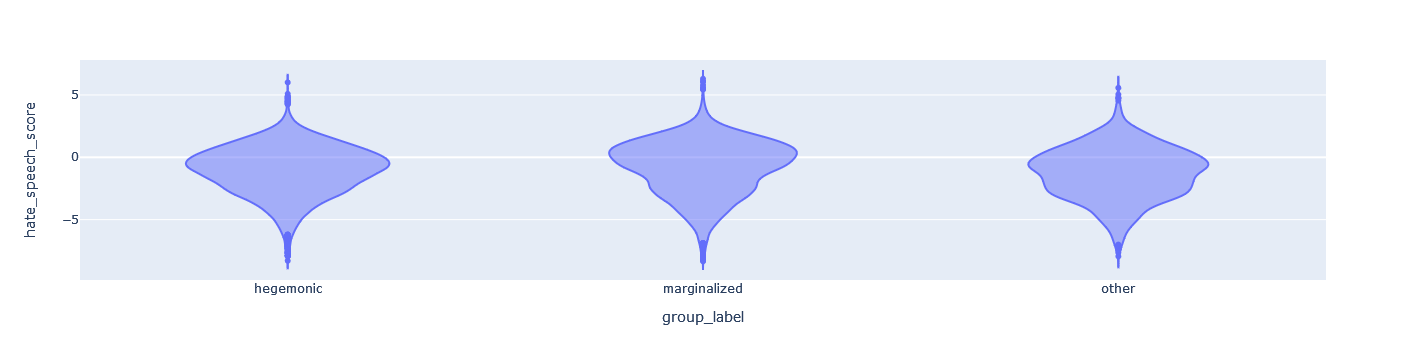

In [16]:
import plotly.express as px

px.violin(targeted, y='hate_speech_score', x='group_label')

# Salminen+2018

## Load data

In [19]:
# Load data, save to csv
import pandas as pd

# path = '/storage2/mamille3/data/hate_speech/salminen2018/salminen2018.xlsx'
# data = pd.read_excel(path, index_col=0)
# data.to_csv('/storage2/mamille3/data/hate_speech/salminen2018/salminen2018.csv')
data = pd.read_csv('/storage2/mamille3/data/hate_speech/salminen2018/salminen2018.csv', index_col=0)
line = ['salminen2018', len(data)]
print(len(data))
data.head()

3222


,title,type,message,Class,Sub 1,Sub 2,Sub 3,Sub 4,Sub 5
ID,,,,,,,,,
22838,Virginia Police Pepper-Sprayed A Man Having A Medical Emergency,video,"this is disgusting and heartbreaking. they should do the same shit to the cops of what they did to that poor guy. 10 seconds of pepper spray directly into the face, run over foot etc. equal it up a little bit, except for the detail of having a fucking stroke. so it still wouldn't be exactly what the guy went through. fucking discusting. they get a hard on power tripping others. they are just fucking cowards",Hateful,Towards law enforcement,NaN,NaN,NaN,NaN
53074,Delaware Police Officer Re-Indicted For Brutality Caught On Cam,video,Fuck that cop. Nothing but a fucking thug. \n\nGang cops,Hateful,Towards law enforcement,NaN,NaN,NaN,NaN
85387,Laquan McDonald Murder Covered Up By Chicago Police,video,"Fucking piece of shit cops, protect and serve my ass",Hateful,Towards law enforcement,NaN,NaN,NaN,NaN
92351,Alabama Police Paralyze Grandfather From India On Camera,video,Land of the free... My fucking ass. America is one hell of a shit hole where its full of dumb sheeple believing in fictional fox news and cops who kill and terrorise more per day than terrorists in this whole world combined.,Hateful,Towards law enforcement,Accusations,NaN,NaN,NaN
96952,Man Killed By Taser,video,These fucking cops are out of control!,Hateful,Towards law enforcement,NaN,NaN,NaN,NaN


## Process data

In [20]:
# Combine sub columns into a list
import numpy as np

subcols = [col for col in data.columns if 'Sub' in col]
data['subs'] = data[subcols].agg(lambda x: [el for el in x if isinstance(el, str)], axis=1)
print(data.columns)
data.head()

print(data['Class'].value_counts())

data['targeted'] = data['subs'].map(lambda x: len(x) > 0)

print(data[['Class', 'targeted']].value_counts())

targeted = data[data['targeted']].copy()
print(len(targeted))
line.append(len(targeted))
print(len(data))

data['hate'] = data['Class']=='Hateful'
data['hate'].value_counts()

# Assign a label to every instance with a target in the dataset
import numpy as np

target_counts = Counter() # weird way of doing this, see SBIC section for better way

def extract_group(target):
    return target.lower().replace('racist towards', '').replace('towards', '').strip()

def assign_label(targets):
    if len(targets) == 0:
        label = np.nan
    else:
        label = 'other'
    target_groups = [extract_group(target) for target in targets]
    for group in target_groups:
        if group in group_labels:
            target_counts[group] +=1
    labels = set([group_labels.get(group, 'other') for group in target_groups])
    if 'marginalized' in labels and not 'hegemonic' in labels:
        label = 'marginalized'
    elif 'hegemonic' in labels:
        label = 'hegemonic'
    return label

# Assign group label to instances
data['target_groups'] = data['subs'].map(lambda x: [groups_norm.get(extract_group(t), extract_group(t)) for t in x])
data['group_label'] = data.subs.map(assign_label)
# print(target_counts.most_common())

# Assign to control group
data['in_control'] = data.target_groups.map(lambda targets: any(t in control_terms for t in targets) if isinstance(targets, list) else False)
print(data.in_control.sum())

# Rename text col, check for NaNs
data.rename(columns={'message': 'text'}, inplace=True)
data.rename(columns={'post': 'text'}, inplace=True)
print(len(data))
data = data.dropna(subset=['text'], how='any')
print(len(data))

# Check index
comments.index.name = 'text_id'
assert not comments.index.duplicated(keep=False).any()

hate_datasets['salminen2018'] = data
data[['subs', 'group_label']].head()

Index(['title', 'type', 'message', 'Class', 'Sub 1', 'Sub 2', 'Sub 3', 'Sub 4',
       'Sub 5', 'subs'],
      dtype='object')
Hateful    2364
Neutral     858
Name: Class, dtype: int64
Class    targeted
Hateful  True        2363
Neutral  False        858
Hateful  False          1
dtype: int64
2363
3222
212
3222
3221


,subs,group_label
ID,,
22838,[Towards law enforcement],hegemonic
53074,[Towards law enforcement],hegemonic
85387,[Towards law enforcement],hegemonic
92351,"[Towards law enforcement, Accusations]",hegemonic
96952,[Towards law enforcement],hegemonic


## View, count targets

In [21]:
# View groups that are not already labeled
from collections import Counter

targets_flat = [extract_group(t) for targets in data.subs for t in targets]
targets = Counter(targets_flat)
print(len(targets))
# targets.most_common()
# [(target, count) for (target, count) in targets.most_common() if not target in group_labels]

target_counts = pd.Series(target_counts).sort_values(ascending=False)
target_counts

# Add counts to group_target_distros
dataset = 'salminen2018'
for group, count in target_counts.iteritems():
    group_target_distros.append(
        {'group': group, 'group_label': group_labels.get(group, 'other'), 'dataset': dataset, 'count': count}
    )

vc = data.group_label.value_counts()
line.extend([vc['hegemonic'], vc['marginalized'], vc['other']])
print(line)
group_label_distros.append(line)
print(group_label_distros)
pd.concat([vc, data.group_label.value_counts(normalize=True)], axis=1)

36
['salminen2018', 3222, 2363, 494, 482, 1387]
[['cad', 26329, 4106, 312, 2292, 1502], ['elsherief2021', 21480, 6358, 1161, 4052, 1145], ['sbic', 44781, 15862, 490, 11603, 3769], ['kennedy2020', 39565, 38583, 14155, 21547, 2881], ['salminen2018', 3222, 2363, 494, 482, 1387]]


,group_label,group_label
other,1387,0.586966
hegemonic,494,0.209056
marginalized,482,0.203978


In [75]:
# Get top groups in each split
# Assumes target_counts is sorted with most frequent at the top

n=5
corpus = 'salminen2018'
for label in ['hegemonic', 'marginalized', 'other']:
    # print(label)
    selected_groups = [group for group in target_counts.index if group_labels.get(group)==label]
    filtered = target_counts[selected_groups]
    new_row = pd.DataFrame([[corpus, label, ', '.join(filtered.head(n).index.tolist())]], columns=top_groups.columns)
    top_groups = pd.concat([top_groups, new_row], axis=0)
    # print(filtered.head(n))
    print()
    
top_groups

,corpus,split,top_groups
0,cad,hegemonic,"involuntary celibates, white people, police officers, people from america, men"
1,cad,marginalized,"women, people with mental disabilities, black people, gay men, transgender people"
2,cad,other,"left-wing people, moderators, liberals, communists, left-wing people (social justice)"
3,elsherief2020,hegemonic,"white people, whites, white folks, christians, white men"
4,elsherief2020,marginalized,"immigrants, minorities, muslims, jews, blacks"
5,elsherief2020,other,"liberals, progressives, conservatives, democrats, leftists"
6,sbic,hegemonic,"men, white folks, americans, white people, whites"
7,sbic,marginalized,"muslim folks, arabic folks, immigrants, women, trans women"
8,sbic,other,"liberals, assault victims, ugly folks, conservatives, mass shooting victims"
9,mlma_en,hegemonic,christian


# Save out processed datasets
For later splitting into folds for training ML models

In [21]:
hate_datasets.keys()

dict_keys(['cad', 'elsherief2021', 'sbic', 'kennedy2020', 'salminen2018'])

In [22]:
import pickle

outpath = '/storage2/mamille3/hegemonic_hate/tmp/processed_datasets.pkl'
with open(outpath, 'wb') as f:
    pickle.dump(hate_datasets, f)

# Multilingual and Multi-aspect dataset (MLMA)

In [35]:
import os
import pandas as pd

dirpath = '/storage2/mamille3/data/hate_speech/mlma/'
fpath = os.path.join(dirpath, 'en_dataset.csv')
data = pd.read_csv(fpath, index_col=0)
line = ['mlma_en', len(data)]
data.head()

,tweet,sentiment,directness,annotator_sentiment,target,group
HITId,,,,,,
1,call sis im boy girl still faggot shut,offensive,indirect,confusion_disgust,origin,gay
2,@user @user legit nilas retarded idk,offensive_disrespectful,indirect,anger_confusion,disability,special_needs
3,said retard @url,fearful_abusive_offensive_hateful,indirect,confusion_disgust,disability,special_needs
4,america another 8 years obama's ideology via hillary we'd well way shithole country.,fearful_abusive_hateful_disrespectful_normal,indirect,anger_fear_shock_sadness_disgust,origin,other
5,@user don... fucking made cry twat.,offensive,indirect,shock_disgust,gender,women


In [36]:
vc = data.group.value_counts()
line.append(vc.sum())
print(vc.sum())
vc

5647


other               1590
special_needs       1571
women                878
individual           497
left_wing_people     177
refugees             171
gay                  163
immigrants           130
hispanics            105
muslims              101
african_descent       86
indian/hindu          83
asians                61
jews                  24
arabs                  6
christian              4
Name: group, dtype: int64

In [77]:
# View groups that are not already labeled
vc[~vc.index.isin(group_labels)]

other         1590
individual     497
Name: group, dtype: int64

In [37]:
for label in ['hegemonic', 'marginalized', 'other']:
    print(label)
    n_instances_labeled = sum([count for group, count in vc.iteritems() if group_labels.get(group, 'other')==label])
    print(f'{n_instances_labeled/sum(vc)} ({n_instances_labeled}/{sum(vc)})')
    line.append(n_instances_labeled)

# Add counts to group_label_distros
group_label_distros.append(line)
print(line)

hegemonic
0.0007083407118824154 (4/5647)
marginalized
0.5983708163626704 (3379/5647)
other
0.40092084292544716 (2264/5647)
['mlma_en', 5647, 5647, 4, 3379, 2264]


In [38]:
# Get top groups in each split
target_counts = vc
n=5
corpus = 'mlma_en'
for label in ['hegemonic', 'marginalized', 'other']:
    print(label)
    selected_groups = [group for group in target_counts.index if group_labels.get(group)==label]
    filtered = target_counts[selected_groups]
    new_row = pd.DataFrame([[corpus, label, ', '.join(filtered.head(n).index.tolist())]], columns=top_groups.columns)
    top_groups = pd.concat([top_groups, new_row], axis=0)
    # print(filtered.head(n))
    print()
    
top_groups

hegemonic

marginalized

other



,corpus,split,top_groups
0,cad,hegemonic,"involuntary celibates, white people, police officers, people from america, men"
0,cad,marginalized,"women, people with mental disabilities, black people, gay men, transgender people"
0,cad,other,"left-wing people, moderators, liberals, communists, left-wing people (social justice)"
0,elsherief2020,hegemonic,"white people, whites, white folks, christians, white men"
0,elsherief2020,marginalized,"immigrants, minorities, muslims, jews, blacks"
0,elsherief2020,other,"liberals, progressives, conservatives, democrats, leftists"
0,sbic,hegemonic,"men, white folks, americans, white people, whites"
0,sbic,marginalized,"muslim folks, arabic folks, immigrants, women, trans women"
0,sbic,other,"liberals, assault victims, ugly folks, conservatives, mass shooting victims"
0,sbic,hegemonic,christian


In [39]:
top_groups.reset_index(inplace=True)
top_groups

,index,corpus,split,top_groups
0,0,cad,hegemonic,"involuntary celibates, white people, police officers, people from america, men"
1,0,cad,marginalized,"women, people with mental disabilities, black people, gay men, transgender people"
2,0,cad,other,"left-wing people, moderators, liberals, communists, left-wing people (social justice)"
3,0,elsherief2020,hegemonic,"white people, whites, white folks, christians, white men"
4,0,elsherief2020,marginalized,"immigrants, minorities, muslims, jews, blacks"
5,0,elsherief2020,other,"liberals, progressives, conservatives, democrats, leftists"
6,0,sbic,hegemonic,"men, white folks, americans, white people, whites"
7,0,sbic,marginalized,"muslim folks, arabic folks, immigrants, women, trans women"
8,0,sbic,other,"liberals, assault victims, ugly folks, conservatives, mass shooting victims"
9,0,sbic,hegemonic,christian


In [41]:
for x in range(9,12):
    top_groups.loc[x, 'corpus'] = 'mlma_en'
top_groups 

,index,corpus,split,top_groups
0,0,cad,hegemonic,"involuntary celibates, white people, police officers, people from america, men"
1,0,cad,marginalized,"women, people with mental disabilities, black people, gay men, transgender people"
2,0,cad,other,"left-wing people, moderators, liberals, communists, left-wing people (social justice)"
3,0,elsherief2020,hegemonic,"white people, whites, white folks, christians, white men"
4,0,elsherief2020,marginalized,"immigrants, minorities, muslims, jews, blacks"
5,0,elsherief2020,other,"liberals, progressives, conservatives, democrats, leftists"
6,0,sbic,hegemonic,"men, white folks, americans, white people, whites"
7,0,sbic,marginalized,"muslim folks, arabic folks, immigrants, women, trans women"
8,0,sbic,other,"liberals, assault victims, ugly folks, conservatives, mass shooting victims"
9,0,mlma_en,hegemonic,christian


In [42]:
top_groups.drop(columns='index', inplace=True)
top_groups

,corpus,split,top_groups
0,cad,hegemonic,"involuntary celibates, white people, police officers, people from america, men"
1,cad,marginalized,"women, people with mental disabilities, black people, gay men, transgender people"
2,cad,other,"left-wing people, moderators, liberals, communists, left-wing people (social justice)"
3,elsherief2020,hegemonic,"white people, whites, white folks, christians, white men"
4,elsherief2020,marginalized,"immigrants, minorities, muslims, jews, blacks"
5,elsherief2020,other,"liberals, progressives, conservatives, democrats, leftists"
6,sbic,hegemonic,"men, white folks, americans, white people, whites"
7,sbic,marginalized,"muslim folks, arabic folks, immigrants, women, trans women"
8,sbic,other,"liberals, assault victims, ugly folks, conservatives, mass shooting victims"
9,mlma_en,hegemonic,christian


# ConvAbuse
Just labels characteristic (like 'racist')

In [36]:
# Load data
import pandas as pd
import os

dirpath = '/storage2/mamille3/data/hate_speech/convabuse/'
folds = []
for fold in ['train', 'valid', 'test']:
    folds.append(pd.read_csv(os.path.join(dirpath, '2_splits', f'ConvAbuseEMNLP{fold}.csv'), index_col=0))
data = pd.concat(folds)
data

,conv_id,prev_agent,prev_user,agent,user,bot,Annotator1_is_abuse.1,Annotator1_is_abuse.0,Annotator1_is_abuse.-1,Annotator1_is_abuse.-2,...,Annotator8_racist,Annotator8_sexist,Annotator8_sex_harassment,Annotator8_is_abuse.-3.1,Annotator8_target.generalised,Annotator8_target.individual,Annotator8_target.system,Annotator8_explicit,Annotator8_implicit,is_abuse_majority
example_id,,,,,,,,,,,,,,,,,,,,,
278.0,164070.0,please go on.,"well, i have a eatproblem",can you elaborate on that?,yes,E.L.I.Z.A.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2626.0,349824.0,how long have you been on the verge of suicide?,since i was 10 years old,why do you tell me you were 10 years old just ...,were you not ten years old?,E.L.I.Z.A.,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1843.0,288277.0,you are being a bit negative.,i hate you,do you wish to hate me?,yea,E.L.I.Z.A.,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2102.0,3112397898840869,will you be travelling in economy class?,economy,what city will you be flying from?,ibadan,CarbonBot,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2440.0,3326148254080022,will you be travelling in economy class?,no,what city will you be flying from?,bangalore,CarbonBot,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420.0,465681.0,_,moron,please go on.,everyone thinks i am a moron,E.L.I.Z.A.,NaN,NaN,NaN,NaN,...,1,0,0,0,None,0,0,None,0,0
2122.0,312680.0,why do you not understand?,do me friend,can you elaborate on that?,you have girl frient,E.L.I.Z.A.,NaN,NaN,NaN,NaN,...,0,0,0,0,None,0,0,None,0,0
999.0,2359856270787257,good to know,oh darling lets you and me having fun together...,so,oh darling i love <span class='emoji-bytes' da...,CarbonBot,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [38]:
data.columns.tolist()

['conv_id',
 'prev_agent',
 'prev_user',
 'agent',
 'user',
 'bot',
 'Annotator1_is_abuse.1',
 'Annotator1_is_abuse.0',
 'Annotator1_is_abuse.-1',
 'Annotator1_is_abuse.-2',
 'Annotator1_is_abuse.-3',
 'Annotator1_ableist',
 'Annotator1_homophobic',
 'Annotator1_intellectual',
 'Annotator1_racist',
 'Annotator1_sexist',
 'Annotator1_sex_harassment',
 'Annotator1_transphobic',
 'Annotator1_target.generalised',
 'Annotator1_target.individual',
 'Annotator1_target.system',
 'Annotator1_explicit',
 'Annotator1_implicit',
 'Annotator2_is_abuse.1',
 'Annotator2_is_abuse.0',
 'Annotator2_is_abuse.-1',
 'Annotator2_is_abuse.-2',
 'Annotator2_is_abuse.-3',
 'Annotator2_ableist',
 'Annotator2_homophobic',
 'Annotator2_intellectual',
 'Annotator2_racist',
 'Annotator2_sexist',
 'Annotator2_sex_harassment',
 'Annotator2_transphobic',
 'Annotator2_target.generalised',
 'Annotator2_target.individual',
 'Annotator2_target.system',
 'Annotator2_explicit',
 'Annotator2_implicit',
 'Annotator3_is_abuse.

In [40]:
data['Annotator2_target.generalised'].value_counts()

0                     1184
None                   290
'system'                43
0, 0                    28
1                        9
'group'                  5
None, None               4
0, 0, 0                  2
'system', 'system'       2
'system', None           1
'3rd party'              1
Name: Annotator2_target.generalised, dtype: int64

# Plot distributions of group labels across datasets 

In [24]:
group_label_distros

[['cad', 26329, 4106, 312, 2292, 1502],
 ['elsherief2021', 21480, 6358, 1161, 4052, 1145],
 ['sbic', 44781, 15862, 490, 12068, 3304],
 ['kennedy2020', 39565, 38583, 14155, 21547, 2881],
 ['salminen2018', 3222, 2363, 494, 482, 1387]]

In [25]:
# Should have just made it a dataframe from the beginning
distros = pd.DataFrame(group_label_distros, columns=['corpus', 'total_items', 'items_labeled_with_target', 'count_hegemonic', 'count_marginalized', 'count_other'])
distros['count_hegemonic'] = distros['count_hegemonic']*-1 # for later graphs
distros = distros.sort_values('count_hegemonic')
distros

,corpus,total_items,items_labeled_with_target,count_hegemonic,count_marginalized,count_other
3,kennedy2020,39565,38583,-14155,21547,2881
1,elsherief2021,21480,6358,-1161,4052,1145
4,salminen2018,3222,2363,-494,482,1387
2,sbic,44781,15862,-490,12068,3304
0,cad,26329,4106,-312,2292,1502


In [177]:
# Convert to long-form df
long_distros = pd.wide_to_long(distros, stubnames='count', sep='_',  i='corpus', j='split', suffix='\w+').reset_index()
long_distros

,corpus,split,items_labeled_with_target,total_items,count
0,kennedy2020,hegemonic,38583,39565,-14155
1,elsherief2021,hegemonic,6358,21480,-1161
2,salminen2018,hegemonic,2363,3222,-494
3,sbic,hegemonic,15862,44781,-490
4,cad,hegemonic,4227,27494,-335
5,mlma_en,hegemonic,5647,5647,-4
6,kennedy2020,marginalized,38583,39565,21547
7,elsherief2021,marginalized,6358,21480,4052
8,salminen2018,marginalized,2363,3222,482
9,sbic,marginalized,15862,44781,12831


In [178]:
selected = long_distros.query('split == "hegemonic" or split == "marginalized"').copy()
# selected.loc[selected['split']=='hegemonic', 'count'] = selected.loc[selected['split']=='hegemonic', 'count'] * -1
selected

,corpus,split,items_labeled_with_target,total_items,count
0,kennedy2020,hegemonic,38583,39565,-14155
1,elsherief2021,hegemonic,6358,21480,-1161
2,salminen2018,hegemonic,2363,3222,-494
3,sbic,hegemonic,15862,44781,-490
4,cad,hegemonic,4227,27494,-335
5,mlma_en,hegemonic,5647,5647,-4
6,kennedy2020,marginalized,38583,39565,21547
7,elsherief2021,marginalized,6358,21480,4052
8,salminen2018,marginalized,2363,3222,482
9,sbic,marginalized,15862,44781,12831


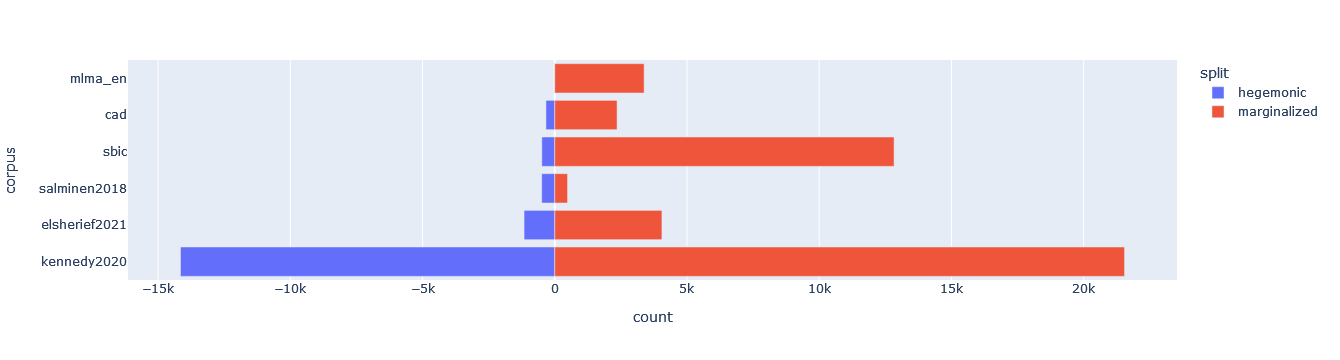

In [179]:
# px.bar(selected, x='corpus', y='count', color='split', barmode='relative')
px.bar(selected, y='corpus', x='count', color='split', barmode='relative', orientation='h')

# Normalize target identities, sample control group of identity groups

In [68]:
target_dataset_counts = pd.DataFrame(group_target_distros)
print(target_dataset_counts.dataset.unique())
target_dataset_counts.drop_duplicates(inplace=True)
target_dataset_counts

# View distributions of counts over datasets for normalized hegemonic labels
# Convert to wide format from long over dataset (pivot tables maybe?)
heg_targets = target_dataset_counts.query('group_label == "hegemonic"')
print(heg_targets.dataset.unique())

heg_counts = heg_targets.drop(columns=['group_label']).pivot_table(index=['group'], columns=['dataset'])
heg_counts

heg_counts['group_normalized'] = heg_counts.index.map(lambda x: groups_norm.get(x, x))
heg_counts

heg_counts = heg_counts.groupby('group_normalized').agg({col: 'sum' for col in heg_counts.columns if col[0]=='count'})
heg_counts

log_heg_counts = heg_counts.apply(np.log2).replace(-np.inf, -1)
log_heg_counts['magnitude'] = np.linalg.norm(log_heg_counts[[col for col in log_heg_counts.columns if col[0] == 'count']], axis=1)
log_heg_counts = log_heg_counts.sort_values('magnitude', ascending=False).drop(columns='magnitude')
log_heg_counts

['cad' 'elsherief2021' 'sbic' 'kennedy2020' 'salminen2018']
['cad' 'elsherief2021' 'sbic' 'kennedy2020' 'salminen2018']


count                                         \
dataset                     cad elsherief2021 kennedy2020 salminen2018   
group_normalized                                                         
white people           6.321928     10.008429   12.094078     5.807355   
men                    4.321928      1.584963   12.599215    -1.000000   
christians             4.247928      4.247928   11.422065    -1.000000   
straight people       -1.000000     -1.000000   11.681238    -1.000000   
police officers        5.129283      3.584963   -1.000000     7.965784   
middle-aged people    -1.000000     -1.000000    8.942515    -1.000000   
rich people            4.000000      2.321928   -1.000000     6.768184   
americans              4.906891      3.321928   -1.000000    -1.000000   
involuntary celibates  6.643856     -1.000000   -1.000000    -1.000000   
corporations          -1.000000     -1.000000   -1.000000     6.285402   
white men              3.584963      4.087463   -1.000000    -1.000000   
conservative men      -1.000000      4.857981   -1.000000    -1.000000   
white conservatives   -1.000000      4.000000   -1.000000    -1.000000   
white liberals        -1.000000      3.700440   -1.000000    -1.000000   
military              -1.000000     -1.000000   -1.000000     3.321928   
white nationalists    -1.000000      2.807355   -1.000000    -1.000000   

                                 
dataset                    sbic  
group_normalized                 
white people           7.375039  
men                    6.882643  
christians             7.721099  
straight people       -1.000000  
police officers        5.129283  
middle-aged people    -1.000000  
rich people            0.000000  
americans              5.000000  
involuntary celibates -1.000000  
corporations          -1.000000  
white men              2.321928  
conservative men      -1.000000  
white conservatives   -1.000000  
white liberals        -1.000000  
military               0.000000  
white nationalists    -1.000000

In [69]:
# Find marginalized terms with similar frequency distributions across datasets as margemonic ones
marg_targets = target_dataset_counts.query('group_label == "marginalized"')
print(marg_targets.dataset.unique())

marg_counts = marg_targets.drop(columns=['group_label']).pivot_table(index=['group'], columns=['dataset'])
marg_counts

marg_counts['group_normalized'] = marg_counts.index.map(lambda x: groups_norm.get(x, x))
marg_counts

marg_counts = marg_counts.groupby('group_normalized').agg({col: 'sum' for col in marg_counts.columns if col[0]=='count'})
marg_counts

log_marg_counts = marg_counts.apply(np.log2).replace(-np.inf, -1)
log_marg_counts

# Find closest match by Euclidean distance in marginalized terms
from IPython.display import display

marg = log_marg_counts.copy()
control_terms = []

for heg_term, heg_vec in log_heg_counts.iterrows():
    distances = np.linalg.norm(marg.values - heg_vec.values, axis=1)
    closest_marg = marg.index[np.argmin(distances)]
    control_terms.append(closest_marg)
    marg.drop(closest_marg, inplace=True) 
    
display(log_marg_counts.loc[control_terms])
display(log_heg_counts)

# Save control terms out
control_terms

['cad' 'elsherief2021' 'sbic' 'kennedy2020' 'salminen2018']


count                                         \
dataset                     cad elsherief2021 kennedy2020 salminen2018   
group_normalized                                                         
muslims                6.918863      9.330917   11.745254      7.72792   
latinx people          3.584963      4.000000   11.470150     -1.00000   
gay people             6.643856      5.087463   12.549785     -1.00000   
bisexual people       -1.000000     -1.000000   11.794822     -1.00000   
indian people          4.321928      3.700440   -1.000000     -1.00000   
non-binary people     -1.000000     -1.000000   10.203348     -1.00000   
black men              3.321928      3.169925   -1.000000     -1.00000   
mexican people         4.523562      4.754888   -1.000000     -1.00000   
lgbtq+ people          7.044394     -1.000000   -1.000000     -1.00000   
black lives matter    -1.000000      2.807355   -1.000000     -1.00000   
refugees               1.584963      3.584963   -1.000000     -1.00000   
iranians              -1.000000      2.807355   -1.000000     -1.00000   
foreigners             1.584963      2.584963   -1.000000     -1.00000   
romani people          3.807355     -1.000000   -1.000000     -1.00000   
holocaust survivors   -1.000000     -1.000000   -1.000000     -1.00000   
people with aspergers  4.169925     -1.000000   -1.000000     -1.00000   

                                 
dataset                    sbic  
group_normalized                 
muslims                9.556506  
latinx people          8.974415  
gay people             3.807355  
bisexual people       -1.000000  
indian people          6.285402  
non-binary people     -1.000000  
black men             -1.000000  
mexican people         6.392317  
lgbtq+ people         -1.000000  
black lives matter    -1.000000  
refugees               3.169925  
iranians              -1.000000  
foreigners             0.000000  
romani people         -1.000000  
holocaust survivors    4.392317  
people with aspergers -1.000000

count                                         \
dataset                     cad elsherief2021 kennedy2020 salminen2018   
group_normalized                                                         
white people           6.321928     10.008429   12.094078     5.807355   
men                    4.321928      1.584963   12.599215    -1.000000   
christians             4.247928      4.247928   11.422065    -1.000000   
straight people       -1.000000     -1.000000   11.681238    -1.000000   
police officers        5.129283      3.584963   -1.000000     7.965784   
middle-aged people    -1.000000     -1.000000    8.942515    -1.000000   
rich people            4.000000      2.321928   -1.000000     6.768184   
americans              4.906891      3.321928   -1.000000    -1.000000   
involuntary celibates  6.643856     -1.000000   -1.000000    -1.000000   
corporations          -1.000000     -1.000000   -1.000000     6.285402   
white men              3.584963      4.087463   -1.000000    -1.000000   
conservative men      -1.000000      4.857981   -1.000000    -1.000000   
white conservatives   -1.000000      4.000000   -1.000000    -1.000000   
white liberals        -1.000000      3.700440   -1.000000    -1.000000   
military              -1.000000     -1.000000   -1.000000     3.321928   
white nationalists    -1.000000      2.807355   -1.000000    -1.000000   

                                 
dataset                    sbic  
group_normalized                 
white people           7.375039  
men                    6.882643  
christians             7.721099  
straight people       -1.000000  
police officers        5.129283  
middle-aged people    -1.000000  
rich people            0.000000  
americans              5.000000  
involuntary celibates -1.000000  
corporations          -1.000000  
white men              2.321928  
conservative men      -1.000000  
white conservatives   -1.000000  
white liberals        -1.000000  
military               0.000000  
white nationalists    -1.000000

['muslims',
 'latinx people',
 'gay people',
 'bisexual people',
 'indian people',
 'non-binary people',
 'black men',
 'mexican people',
 'lgbtq+ people',
 'black lives matter',
 'refugees',
 'iranians',
 'foreigners',
 'romani people',
 'holocaust survivors',
 'people with aspergers']

In [70]:
outpath = '/storage2/mamille3/hegemonic_hate/control_identity_terms.txt'
with open(outpath, 'w') as f:
    for term in control_terms:
        f.write(f'{term}\n')

In [118]:
# Check counts across datasets for heg and control
print(heg_counts.sum())
print(heg_counts.sum().sum())
print()
print(marg_counts.loc[control_terms].sum())
print(marg_counts.loc[control_terms].sum().sum())

       dataset      
count  cad                312.0
       elsherief2021     1161.0
       kennedy2020      17097.0
       salminen2018       503.0
       sbic               569.0
dtype: float64
19642.0

       dataset      
count  cad                456.0
       elsherief2021      775.0
       kennedy2020      16998.0
       salminen2018       433.0
       sbic              1463.0
dtype: float64
20125.0


In [44]:
# Create boolean column of control/not
for dataset in hate_datasets:
    print(dataset)
    hate_datasets[dataset]['in_control'] = hate_datasets[dataset]['target_groups'].map(lambda x: any([groups_norm.get(term, term) in control_terms for term in x]) if isinstance(x, list) else False)
    print(hate_datasets[dataset].in_control.sum())

cad
456
elsherief2021
777
sbic
1231
kennedy2020
12359
salminen2018
415


In [129]:
# Check hegemonic instance counts (not sure why this isn't as close, but something to do with basing the matching off of term counts vs this is instances with any of the terms)
for dataset in hate_datasets:
    print(dataset)
    print(sum(hate_datasets[dataset]['group_label']=='hegemonic'))

cad
312
elsherief2021
1161
sbic
490
kennedy2020
14155
salminen2018
494


In [78]:
# These might be more popular than the hegemonic ones, though, in which case it would create dataset splits that are more distinct
# Want them to be roughly as popular overall/for each dataset as the hegemonic set of labels is
distros

target_dataset_counts['group_normalized'] = target_dataset_counts.group.map(lambda x: groups_norm.get(x, x))
target_dataset_counts['control_group'] = target_dataset_counts.group_normalized.isin(control_groups)
control_group_instances = target_dataset_counts.query('control_group').groupby('dataset')['count'].sum()
distros.join(control_group_instances)[['count_hegemonic', 'count']]

,count_hegemonic,count
corpus,,
cad,312,516.0
sbic,490,5131.0
kennedy2020,14155,13857.0
elsherief2021,1161,523.0
salminen2018,494,NaN


In [79]:
# Look for marginalized identities that have similar frequency distributions to hegemonic terms
# Just get Euclidean distance between vectors of target groups (with maybe a log somewhere since kennedy2020 is so different?)
# Try individual matching between hegemonic terms and marginalized

## Sample control marginalized identities weighted by popularity

In [60]:
# Normalize counts by dataset length
distros = pd.DataFrame(group_label_distros, columns=['corpus', 'total_items', 'items_labeled_with_target', 'count_hegemonic', 'count_marginalized', 'count_other']).set_index('corpus')
distros

merged = target_dataset_counts.join(distros, on=['dataset']).drop(columns=['count_hegemonic', 'count_marginalized', 'count_other'])
print(len(merged))
print(len(target_dataset_counts))
merged.head()

merged['count_normalized'] = merged['count']/merged['items_labeled_with_target']
merged.head()

# Group most popular identities first
gped = merged.groupby('group').agg({'count_normalized': 'sum', 'group_label': 'first'}).sort_values('count_normalized', ascending=False)
gped

gped['group_normalized'] = gped.index.map(lambda x: groups_norm.get(x, x))

def assign_label(labels):
    label = 'other'
    labels = set(labels)
    if 'marginalized' in labels and not 'hegemonic' in labels:
        label = 'marginalized'
    elif 'hegemonic' in labels:
        label = 'hegemonic'
    return label

gped_norm = gped.groupby('group_normalized').agg({'count_normalized': 'sum', 'group_label': assign_label}).sort_values('count_normalized', ascending=False)
gped_norm

# Sample a group of identities for the control group
possibilities = gped_norm.query('group_label == "marginalized"').iloc[:100]
possibilities

1819
1819


,count_normalized,group_label
group_normalized,,
women,0.644550,marginalized
black people,0.602245,marginalized
muslims,0.356924,marginalized
immigrants,0.259028,marginalized
jews,0.246004,marginalized
gay people,0.185990,marginalized
people with mental disabilities,0.155451,marginalized
asian people,0.126950,marginalized
arabic/middle eastern people,0.123931,marginalized


In [77]:
control_groups = possibilities.sample(2, weights=possibilities.count_normalized, random_state=9).index
control_groups

Index(['women', 'jews'], dtype='object', name='group_normalized')

In [78]:
# These might be more popular than the hegemonic ones, though, in which case it would create dataset splits that are more distinct
# Want them to be roughly as popular overall/for each dataset as the hegemonic set of labels is
distros

target_dataset_counts['group_normalized'] = target_dataset_counts.group.map(lambda x: groups_norm.get(x, x))
target_dataset_counts['control_group'] = target_dataset_counts.group_normalized.isin(control_groups)
control_group_instances = target_dataset_counts.query('control_group').groupby('dataset')['count'].sum()
distros.join(control_group_instances)[['count_hegemonic', 'count']]

,count_hegemonic,count
corpus,,
cad,312,516.0
sbic,490,5131.0
kennedy2020,14155,13857.0
elsherief2021,1161,523.0
salminen2018,494,NaN


# Group target identities

In [22]:
target_dataset_counts = pd.DataFrame(group_target_distros)
print(target_dataset_counts.dataset.unique())
target_dataset_counts.drop_duplicates(inplace=True)
target_dataset_counts['group_normalized'] = target_dataset_counts.group.map(lambda x: groups_norm.get(x, x))
selected = target_dataset_counts.query('count > 20').sort_values(['dataset', 'count'], ascending=False)
selected

['cad' 'elsherief2021' 'sbic' 'kennedy2020' 'salminen2018']


,group,group_label,dataset,count,group_normalized
764,black folks,marginalized,sbic,4371,black people
758,women,marginalized,sbic,3688,women
783,jewish folks,marginalized,sbic,1417,jews
763,assault victims,other,sbic,890,assault victims
755,muslim folks,marginalized,sbic,727,muslims
773,gay men,marginalized,sbic,677,gay men
794,asian folks,marginalized,sbic,575,asian people
762,latino/latina folks,marginalized,sbic,502,latinx people
769,physically disabled folks,marginalized,sbic,499,people with physical disabilities
798,mass shooting victims,other,sbic,399,mass shooting victims


In [3]:
identity_groups = {
    'white people': ['white people'],
    'corporations': ['corporations'],
    'minorities': ['people of color'],
    'transgender men': ['lgbtq+ people', 'men'],
    'people with physical disabilities': ['people with disabilities'],
    'rape victims': ['victims of violence'],
    'bisexual women': ['lgbtq+ people', 'women'],
    'poor folks': ['working class people'],
    'bisexual': ['lgbtq+ people'],
    'native_american': ['indigenous people'],
    'non_binary': ['lgbtq+ people'],
    'non-binary people': ['lgbtq+ people'],
    'mormon': ['mormons'],
    'atheists': ['atheists'],
    'teenagers': ['young people'],
    'seniors': ['older people'],
    'disability_hearing_impaired': ['people with disabilities'],
    'disability_visually_impaired': ['people with disabilities'],
    'young_adults': ['young people'],
    'ethiopian people': ['black people'],
    'bisexual men': ['lgbtq+ people', 'men'],
    'sexual assault victims': ['victims of violence'],
    'harassment victims': ['victims of violence'],
    'children': ['young people'],
    'old folks': ['older people'],
    'orphans': ['young people'], # debatable,
    'child rape victims': ['victims of violence'],
    'child sexual assault victims': ['victims of violence'],
    'genocide victims': ['victims of violence', 'people of color'],
    'pedophilia victims': ['victims of violence'],
    'kids': ['young people'],
    'japanese': ['asian people'],
    'japanese people': ['asian people'],
    'holocaust survivors': ['victims of violence', 'jews'],
    'child molestation victims': ['victims of violence'],
    'priests': ['christians'],
    'assault victims': ['victims of violence'],
    'mass shooting victims': ['victims of violence'],
    'terrorism victims': ['victims of violence'],
    'lesbian women': ['lgbtq+ people', 'women'],
    'holocaust victims': ['victims of violence', 'jews'],
    'native american people': ['indigenous people', 'people of color'],
    'black people': ['black people', 'people of color'],
    'liberals': ['left-wing people'],
    'progressives': ['left-wing people'],
    'leftists': ['left-wing people'],
    'mexican people': ['latinx people', 'people of color'],
    'white men': ['white people', 'men'],
    'conservative men': ['right-wing people', 'men'],
    'white conservatives': ['right-wing people', 'white people'],
    'antifa': ['left-wing extremists', 'left-wing people'],
    'white liberals': ['white people', 'left-wing people'],
    'germans': ['europeans'],
    'arabic/middle eastern people': ['muslims and arabic/middle eastern people'],
    'african people': ['black people'],
    'middle eastern folks': ['arabic/middle eastern people'],
    'refugees': ['immigrants'],
    'people with mental disabilities': ['people with disabilities'],
    'gay men': ['lgbtq+ people'],
    'transgender people': ['lgbtq+ people'],
    'muslims': ['muslims and arabic/middle eastern people'],
    'involuntary celibates': ['right-wing extremists', 'right-wing people'], # debatable
    'gay people': ['lgbtq+ people'],
    'left-wing people (social justice)': ['left-wing people'],
    'non-gender dysphoric transgender people': ['lgbtq+ people'],
    'feminists': ['women'],
    'chinese women': ['asian people', 'people of color', 'women'],
    'democrats': ['left-wing people'],
    'people with autism': ['people with disabilities'],
    'chinese people': ['asian people', 'people of color'],
    'police officers': ['military and law enforcement'],
    'undocumented immigrants': ['immigrants'],
    'activists (anti-fascist)': ['left-wing extremists'],
    'donald trump supporters': ['right-wing people'],
    'people from pakistan': ['asian people', 'people of color'],
    'americans': ['americans'],
    'elderly people': ['older people'],
    'working class people': ['working class people'],
    'people of color': ['people of color'],
    'republicans': ['right-wing people'],
    'convservatives': ['right-wing people'],
    'people from mexico': ['latinx people', 'people of color'],
    'gamers': ['gamers'],
    'men': ['men'],
    'indian people': ['asian people', 'people of color'],
    'people with aspergers': ['people with disabilities'],
    'activists (animal rights)': ['left-wing extremists', 'left-wing people'], # debatable
    'rich people': ['rich people'],
    'fans of anthropomorphic animals ("furries")': ['furries'],
    'catholics': ['christians'],
    'romani people': ['romani people'],
    'transgender women': ['lgbtq+ people', 'women'],
    'conservatives': ['right-wing people'],
    'pregnant folks': ['women'], # controversial but I think this is what's implied
    'bisexual people': ['lgbtq+ people'],
    'hindus': ['hindus'],
    'buddhist': ['buddhists'],
    'straight people': ['straight people'],
    'young adults': ['young people'],
    'middle-aged people': ['middle-aged people'],
    'communists': ['left-wing people'],
}

In [4]:
# Save out identity group assignments
import json

outpath = '/storage2/mamille3/hegemonic_hate/identity_groups.json'

with open(outpath, 'w') as f:
    json.dump(identity_groups, f)

In [24]:
# Load identity group assignments
import json

path = '/storage2/mamille3/hegemonic_hate/identity_groups.json'

with open(path, 'r') as f:
    identity_groups = json.load(f)

In [26]:
# Look at terms that I haven't grouped
grouped_identities = set(identity_groups.keys()).union(set([val for vals in identity_groups.values() for val in vals]))
grouped_identities

{'activists (animal rights)',
 'activists (anti-fascist)',
 'african people',
 'americans',
 'antifa',
 'arabic/middle eastern people',
 'asian people',
 'assault victims',
 'atheists',
 'bisexual',
 'bisexual men',
 'bisexual people',
 'bisexual women',
 'black people',
 'buddhist',
 'buddhists',
 'catholics',
 'child molestation victims',
 'child rape victims',
 'child sexual assault victims',
 'children',
 'chinese people',
 'chinese women',
 'christians',
 'communists',
 'conservative men',
 'conservatives',
 'convservatives',
 'corporations',
 'democrats',
 'disability_hearing_impaired',
 'disability_visually_impaired',
 'donald trump supporters',
 'elderly people',
 'ethiopian people',
 'europeans',
 'fans of anthropomorphic animals ("furries")',
 'feminists',
 'furries',
 'gamers',
 'gay men',
 'gay people',
 'genocide victims',
 'germans',
 'harassment victims',
 'hindus',
 'holocaust survivors',
 'holocaust victims',
 'immigrants',
 'indian people',
 'indigenous people',
 'inv

In [31]:
selected.loc[~selected.group_normalized.isin(grouped_identities)]

,group,group_label,dataset,count,group_normalized
799,overweight/fat folks,marginalized,sbic,168,overweight/fat folks
776,ugly folks,other,sbic,57,ugly folks
1047,climate disaster victims,other,sbic,21,climate disaster victims
1810,terrorism,other,salminen2018,86,terrorists
1812,humanity,other,salminen2018,68,humanity
1815,media,other,salminen2018,40,media
1766,specific_country,other,kennedy2020,6569,specific_country
200,not specified,other,elsherief2021,43,not specified
205,no specific group,other,elsherief2021,26,no specific group
6,moderators,other,cad,164,moderators


In [27]:
# Counts of hate targeted at identity groups
target_dataset_counts['identity_group'] = target_dataset_counts.group_normalized.map(lambda x: identity_groups.get(x, [x] if x in grouped_identities else []))
# .query('count > 20').sort_values(['dataset', 'count'], ascending=False)
target_dataset_counts

s = target_dataset_counts.identity_group.apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'identity_group'
del target_dataset_counts['identity_group']
target_group_counts = target_dataset_counts.join(s)
target_group_counts

/tmp/ipykernel_36008/3020858551.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = target_dataset_counts.identity_group.apply(pd.Series, 1).stack()


,group,group_label,dataset,count,group_normalized,identity_group
0,women,marginalized,cad,405,women,women
1,people with mental disabilities,marginalized,cad,317,people with mental disabilities,people with disabilities
2,left-wing people,other,cad,266,left-wing people,left-wing people
3,black people,marginalized,cad,228,black people,black people
3,black people,marginalized,cad,228,black people,people of color
4,gay men,marginalized,cad,182,gay men,lgbtq+ people
5,transgender people,marginalized,cad,172,transgender people,lgbtq+ people
6,moderators,other,cad,164,moderators,NaN
7,muslims,marginalized,cad,121,muslims,muslims and arabic/middle eastern people
8,jewish people,marginalized,cad,111,jews,jews


In [29]:
# But really want 1000 instances of hate at that target (restricts kennedy+2020 and sbic some)
# Should just start from the hate_datasets

threshold = 1000
dataset_group_counts = target_group_counts.groupby(['dataset', 'identity_group'])['count'].sum()
filtered = dataset_group_counts[dataset_group_counts >= threshold]
print(len(filtered))
print(len(filtered.index.get_level_values('identity_group').unique()))
filtered

25
17


dataset        identity_group                          
elsherief2021  people of color                              1760
               white people                                 1076
kennedy2020    asian people                                 3440
               black people                                 6291
               christians                                   2744
               immigrants                                   6590
               indigenous people                            1259
               jews                                         1874
               latinx people                                2837
               lgbtq+ people                               19137
               men                                          8021
               muslims and arabic/middle eastern people     7589
               people of color                              7550
               people with disabilities                     3577
               straight people    

In [1]:
# Save out (shouldn't be manual like this)
selected_dataset_groups = [
    ('elsherief2021', 'people of color'),
    ('elsherief2021', 'white people'),
    ('kennedy2020', 'asian people'),
    ('kennedy2020', 'black people'),
    ('kennedy2020', 'christians'),
    ('kennedy2020', 'immigrants'),
    ('kennedy2020', 'indigenous people'),
    ('kennedy2020', 'jews'),
    ('kennedy2020', 'latinx people'),
    ('kennedy2020', 'lgbtq+ people'),
    ('kennedy2020', 'men'),
    ('kennedy2020', 'muslims and arabic/middle eastern people'),
    ('kennedy2020', 'people of color'),
    ('kennedy2020', 'people with disabilities'),
    ('kennedy2020', 'straight people'),
    ('kennedy2020', 'white people'),
    ('kennedy2020', 'women'),
    ('kennedy2020', 'young people'),
    ('sbic', 'black people'),
    ('sbic', 'jews'),
    ('sbic', 'lgbtq+ people'),
    ('sbic', 'people of color'),
    ('sbic', 'people with disabilities'),
    ('sbic', 'victims of violence'),
    ('sbic', 'women'),
]
len(selected_dataset_groups)

25

In [2]:
import os
import pickle

outpath = '/storage2/mamille3/hegemonic_hate/tmp/selected_dataset_groups.pkl'
with open(outpath, 'wb') as f:
    pickle.dump(selected_dataset_groups, f)